In [44]:
# Import modules
import numpy_financial as npf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Case Study 1: https://www.wallstreetprep.com/knowledge/dcf-model-training-6-steps-building-dcf-model-excel/**

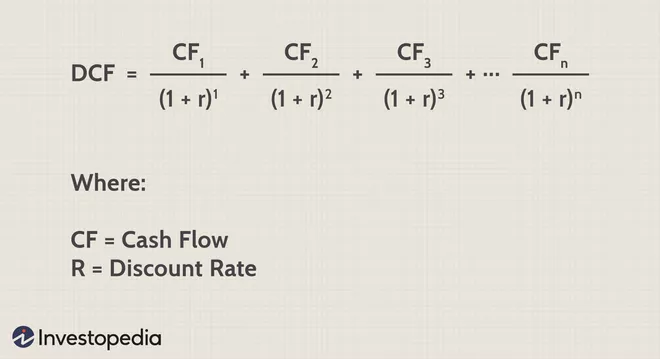

In [45]:
from IPython.display import Image
Image(filename='/Users/faye.pasvouri/ml-projects/LBO_modelling_python_excel/dcf.png',width=800, height=400)

In [46]:
# Assume you have this cash flow 
cash_flow = np.array([46089,48598,51219,53959,56826,59827])
# and a discount rate of 3%
rate = 0.10

# To get the net present value:
npf.npv(rate=rate,values=cash_flow)

249099.73001719947

**Calculating Unlevered Free Cash Flow (FCF)**

In [47]:
dcf_data = {2022:{'EBITDA':74467,'Tax rate': 0.26, 'D&A': 7124, 'NWC':1032, 'Capital expenditures': 9836}}
pd.DataFrame(dcf_data)

,2022
Capital expenditures,9836.00
D&A,7124.00
EBITDA,74467.00
NWC,1032.00
Tax rate,0.26


In [48]:
for year in range(2023,2028):
    prev_data = dcf_data[year-1]
    dcf_data[year] = {'EBITDA':prev_data['EBITDA']*1.05,
                                    'Tax rate': prev_data['Tax rate'],
                                    'D&A': prev_data['D&A']*1.05,
                                    'NWC': prev_data['NWC']*0.9,
                                    'Capital expenditures': prev_data['Capital expenditures']*1.045}
dcf_df = pd.DataFrame(dcf_data).T
dcf_df.T

,2022,2023,2024,2025,2026,2027
EBITDA,74467.00,78190.35,82099.8675,86204.860875,90515.103919,95040.859115
Tax rate,0.26,0.26,0.2600,0.260000,0.260000,0.260000
D&A,7124.00,7480.20,7854.2100,8246.920500,8659.266525,9092.229851
NWC,1032.00,928.80,835.9200,752.328000,677.095200,609.385680
Capital expenditures,9836.00,10278.62,10741.1579,11224.510005,11729.612956,12257.445539


**Calculating UFCF**

In [49]:
dcf_df['EBIT'] = dcf_df.apply(lambda x: x['EBITDA']-x['D&A'],axis=1)
dcf_df['EBIT(1-t)'] = dcf_df.apply(lambda x: x['EBIT']*(1-x['Tax rate']),axis=1)
dcf_df['UFCF'] = dcf_df.apply(lambda x: sum(x[['EBIT(1-t)','D&A','NWC','Capital expenditures']]),axis=1)
dcf_df.T

,2022,2023,2024,2025,2026,2027
EBITDA,74467.00,78190.350,82099.86750,86204.860875,90515.103919,95040.859115
Tax rate,0.26,0.260,0.26000,0.260000,0.260000,0.260000
D&A,7124.00,7480.200,7854.21000,8246.920500,8659.266525,9092.229851
NWC,1032.00,928.800,835.92000,752.328000,677.095200,609.385680
Capital expenditures,9836.00,10278.620,10741.15790,11224.510005,11729.612956,12257.445539
EBIT,67343.00,70710.150,74245.65750,77957.940375,81855.837394,85948.629263
EBIT(1-t),49833.82,52325.511,54941.78655,57688.875878,60573.319671,63601.985655
UFCF,67825.82,71013.131,74373.07445,77912.634383,81639.294352,85561.046725


In [50]:
discount_rate = 0.10
dcf_df['PV of UFCF'] = dcf_df.apply(lambda x: x['UFCF']/(1+discount_rate)**(x.name-2022),axis=1)
PV = dcf_df.loc[range(2023,2028)]['PV of UFCF'].sum()
print("Sum of present values",PV)

Sum of present values 293447.07285627816


In [51]:
import pandas as pd
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl import load_workbook
wb = load_workbook('/Users/faye.pasvouri/ml-projects/LBO_modelling_python_excel/data/lbo_modelling_empty_template.xlsx')  
                     
df = pd.read_excel('/Users/faye.pasvouri/ml-projects/LBO_modelling_python_excel/data/lbo_modelling_empty_template.xlsx')  
ws = wb.active
dcf_df.iloc[0, 0] = 74467
rows = dataframe_to_rows(dcf_df, index=True)
for r_idx, row in enumerate(rows, 1):
    for c_idx, value in enumerate(row, 1):
        ws.cell(row=r_idx, column=c_idx, value=value)
wb.save('/Users/faye.pasvouri/ml-projects/LBO_modelling_python_excel/data/finalised_lbo_modelling.xlsx')


**Terminal Value**

In [52]:
growth_rate = 0.04
gterminal_value = dcf_df.loc[2027]['UFCF']*(1+growth_rate)/(discount_rate-growth_rate)
gpv_terminal_value = gterminal_value/(1+discount_rate)**(2027-2022)
print("Terminal Value", gterminal_value)
print("PV of Terminal Value", gpv_terminal_value)
print("Enterprise Value", PV+gpv_terminal_value)

Terminal Value 1483058.1432324648
PV of Terminal Value 920862.4244695557
Enterprise Value 1214309.497325834


In [53]:
ebitda_multiple = 9
eterminal_value = dcf_df.loc[2027]['EBITDA']*ebitda_multiple
epv_terminal_value = eterminal_value/(1+discount_rate)**(2027-2022)
print("Terminal Value", eterminal_value)
print("PV of Terminal Value", epv_terminal_value)
print("Enterprise Value", PV+epv_terminal_value)

Terminal Value 855367.7320321876
PV of Terminal Value 531116.0638755347
Enterprise Value 824563.1367318128


In [54]:
dcf_df.T

,2022,2023,2024,2025,2026,2027
EBITDA,74467.00,78190.350000,82099.867500,86204.860875,90515.103919,95040.859115
Tax rate,0.26,0.260000,0.260000,0.260000,0.260000,0.260000
D&A,7124.00,7480.200000,7854.210000,8246.920500,8659.266525,9092.229851
NWC,1032.00,928.800000,835.920000,752.328000,677.095200,609.385680
Capital expenditures,9836.00,10278.620000,10741.157900,11224.510005,11729.612956,12257.445539
EBIT,67343.00,70710.150000,74245.657500,77957.940375,81855.837394,85948.629263
EBIT(1-t),49833.82,52325.511000,54941.786550,57688.875878,60573.319671,63601.985655
UFCF,67825.82,71013.131000,74373.074450,77912.634383,81639.294352,85561.046725
PV of UFCF,67825.82,64557.391818,61465.350785,58536.915389,55760.736529,53126.678335
